In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from crk65 import rk_error_control

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

def plot_shape_of_errors(continuous_sol, solution, name):
    minimum_step_size = 1e-5
    errors_small_steps = []
    plt.figure()
    for interp in continuous_sol.interps:
        num_points = 100
        pts_to_sample = create_t_eval(interp.x_i, interp.x_i_plus_1, num_points)
        errors = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            interp_eval = interp.eval(pt)
            errors.append( abs(interp_eval - y) )
        maximum_error = max(errors)
        plot_vals = [ error/ maximum_error for error in errors]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (interp.x_i_plus_1 - interp.x_i < minimum_step_size):
            errors_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(interp.x_i)}_{str(interp.x_i_plus_1)}")
    plt.title(f"{name} - plot of errors")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in errors_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of errors on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('error/(max_error on x_i to x_i_plus_1)')
    # plt.show()

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-5
    (   res, 
        crk5_continous_sol,
        crk6_continous_sol,
        hb6_continous_sol,
        hb8_continous_sol,
        hb10_continous_sol ) = rk_error_control(model, t_span, y0[0], tol)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp


    crk5_computed_solutions = [crk5_continous_sol.eval(x) for x in t_eval]
    crk6_computed_solutions = [crk6_continous_sol.eval(x) for x in t_eval]
    hb6_computed_solutions = [hb6_continous_sol.eval(x) for x in t_eval]
    hb8_computed_solutions = [hb8_continous_sol.eval(x) for x in t_eval]
    hb10_computed_solutions = [hb10_continous_sol.eval(x) for x in t_eval]
    actual_solutions = solution(t_eval)

    plt.figure()
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, crk5_computed_solutions, label="crk5")
    plt.plot(t_eval, crk6_computed_solutions, label="crk6")
    plt.plot(t_eval, hb6_computed_solutions, label="hb6")
    plt.plot(t_eval, hb8_computed_solutions, label="hb8")
    plt.plot(t_eval, hb10_computed_solutions, label="hb10")
    plt.plot(t_eval, actual_solutions, label="solution")
    plt.title("solution vs interpolants")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    crk6_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(crk6_computed_solutions, actual_solutions)]
    crk5_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(crk5_computed_solutions, actual_solutions)]
    hb6_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(hb6_computed_solutions, actual_solutions)]
    hb8_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(hb8_computed_solutions, actual_solutions)]
    hb10_error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(hb10_computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, crk5_error, label="crk5 error")
    plt.plot(t_eval, crk6_error, label="crk6 error")
    plt.plot(t_eval, hb6_error, label="hb6 error")
    plt.plot(t_eval, hb8_error, label="hb8 error")
    plt.plot(t_eval, hb10_error, label="hb10 error")
    # plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    plot_shape_of_errors(crk5_continous_sol, solution, "crk5")
    plot_shape_of_errors(crk6_continous_sol, solution, "crk6")
    plot_shape_of_errors(hb6_continous_sol , solution, "hb6")
    plot_shape_of_errors(hb8_continous_sol , solution, "hb8")
    plot_shape_of_errors(hb10_continous_sol , solution, "hb10")

    
    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))


tried step 0 estimated_error= 0.0025698212391029873
tried step 0 estimated_error= 0.0005049085791074548
tried step 0 estimated_error= 9.33450651229295e-05
tried step 0 estimated_error= 1.3786903585999433e-05
tried step 0 estimated_error= 4.059080773721746e-07
step accepted 0 estimated_error= 4.059080773721746e-07
tried step 0.48225308641975323 estimated_error= 7.196472782133867e-07
step accepted 0.48225308641975323 estimated_error= 7.196472782133867e-07
tried step 1.0609567901234571 estimated_error= 4.017677955880927e-07
step accepted 1.0609567901234571 estimated_error= 4.017677955880927e-07
tried step 1.7554012345679015 estimated_error= 2.2267502541861717e-07
step accepted 1.7554012345679015 estimated_error= 2.2267502541861717e-07
tried step 2.588734567901235 estimated_error= 1.3389908287697594e-07
step accepted 2.588734567901235 estimated_error= 1.3389908287697594e-07
tried step 3.588734567901235 estimated_error= 8.706922816070772e-08
step accepted 3.588734567901235 estimated_error= 

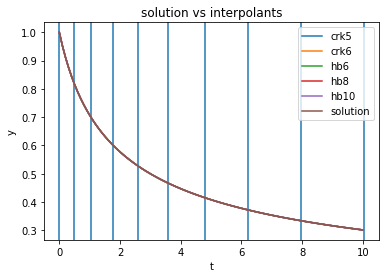

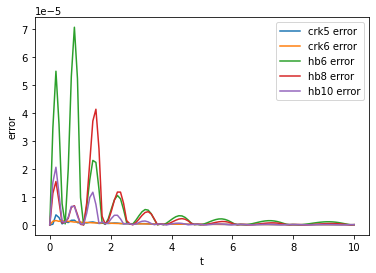

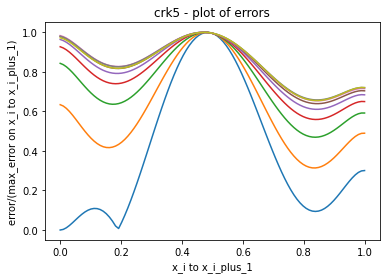

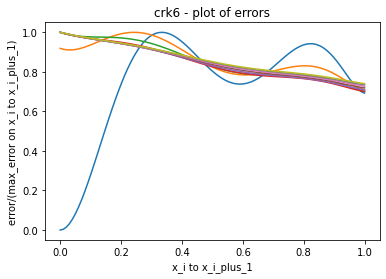

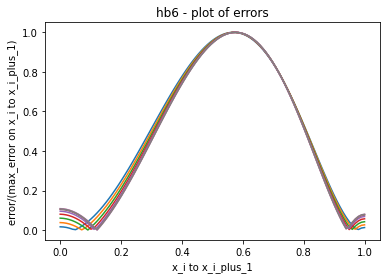

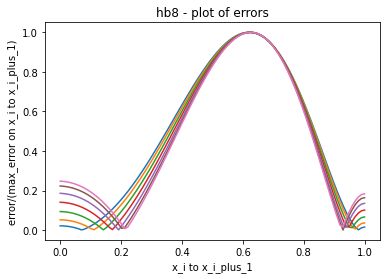

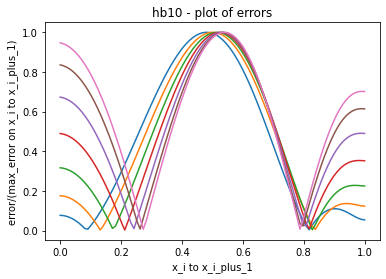

0.0
1.1727359578994623e-06
9.058721098798017e-07
6.358670481265705e-07
4.4568666945909996e-07
3.1623520974077834e-07
2.2735830429443382e-07
1.6537166869223796e-07
1.214692378348481e-07
8.995544081846774e-08


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tried step 0 estimated_error= 0.6532351786768908
tried step 0 estimated_error= 0.08771709250516968
tried step 0 estimated_error= 0.013743289150118132
tried step 0 estimated_error= 0.0026067377402435588
tried step 0 estimated_error= 0.0006072601703988045
tried step 0 estimated_error= 0.00016840080463953466
tried step 0 estimated_error= 5.20318541270548e-05
tried step 0 estimated_error= 1.694316542122376e-05
tried step 0 estimated_error= 5.637888564002935e-06
step accepted 0 estimated_error= 5.637888564002935e-06
tried step 0.2325680393613779 estimated_error= 1.286257587773676e-06
step accepted 0.2325680393613779 estimated_error= 1.286257587773676e-06
tried step 0.4651360787227558 estimated_error= 3.5679469052585233e-06
step accepted 0.4651360787227558 estimated_error= 3.5679469052585233e-06
tried step 0.7442177259564093 estimated_error= 4.812019316735583e-06
step accepted 0.7442177259564093 estimated_error= 4.812019316735583e-06
tried step 1.0791157026367935 estimated_error= 2.370898659

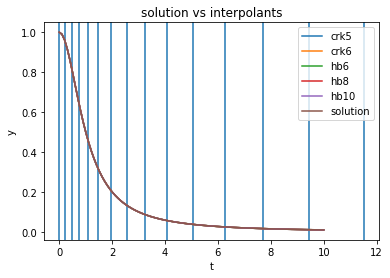

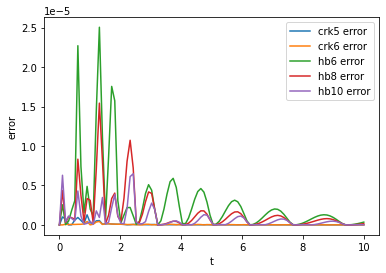

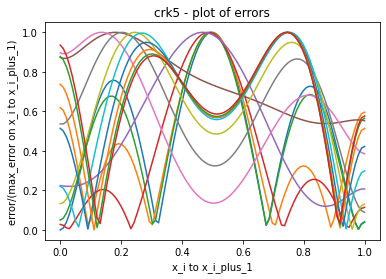

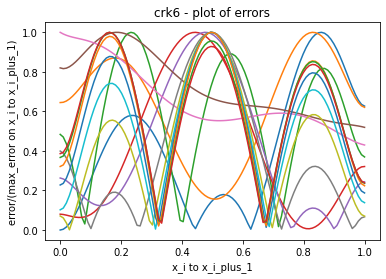

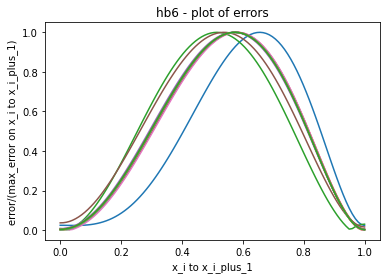

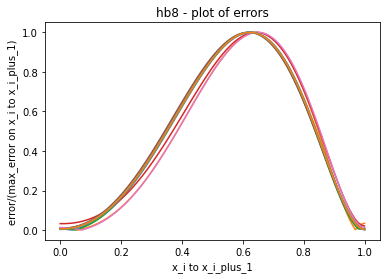

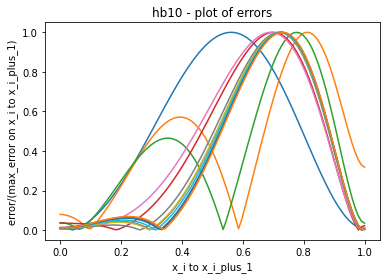

0.0
4.960615285209968e-08
4.7753705878506025e-08
3.64951636688815e-08
1.4630418632144426e-07
1.356113788486546e-07
8.58772915279804e-08
3.693013367334075e-08
6.172787392344503e-09
6.109614841820488e-09
8.26835982320473e-09
6.804262674131589e-09
4.737840095941914e-09
3.0474030035532174e-09
1.879834207567377e-09


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tried step 0 estimated_error= 1.022551376905767e-09
step accepted 0 estimated_error= 1.022551376905767e-09
tried step 1 estimated_error= 1.79116541598745e-08
step accepted 1 estimated_error= 1.79116541598745e-08
tried step 2.2 estimated_error= 1.4464103559319597e-07
step accepted 2.2 estimated_error= 1.4464103559319597e-07
tried step 3.64 estimated_error= 9.741562898568645e-07
step accepted 3.64 estimated_error= 9.741562898568645e-07
tried step 5.368 estimated_error= 5.746907281611868e-06
step accepted 5.368 estimated_error= 5.746907281611868e-06
tried step 7.4416 estimated_error= 8.786978355601605e-06
step accepted 7.4416 estimated_error= 8.786978355601605e-06
tried step 9.5152 estimated_error= 7.356953087622742e-06
step accepted 9.5152 estimated_error= 7.356953087622742e-06
nsteps = 7
nsuccessful_steps = 7
integration complete


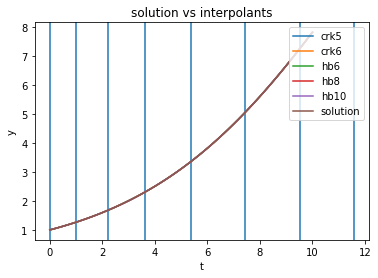

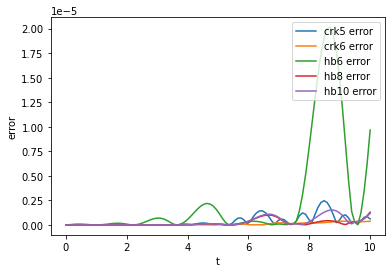

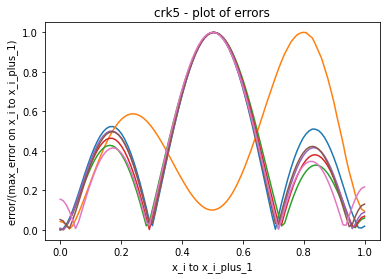

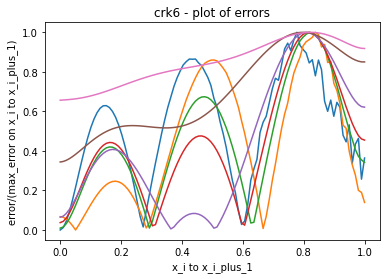

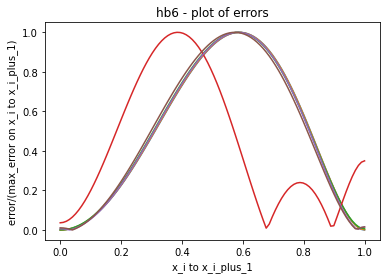

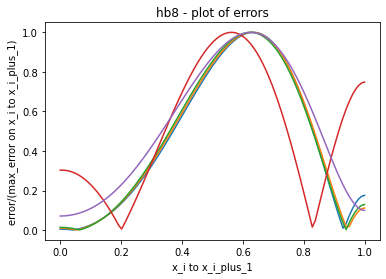

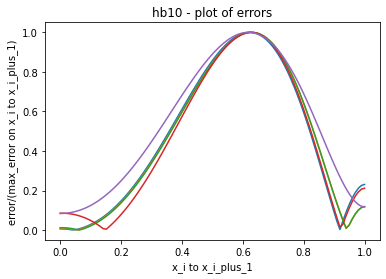

0.0
1.2972511953535104e-11
3.086442212918428e-11
1.1253069587269238e-09
1.3660835129769566e-08
1.3072632487620695e-07
3.229945431115766e-07
4.5162404127552236e-07


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tried step 0 estimated_error= 6806659693.434147
tried step 0 estimated_error= 1337793460.8647544
tried step 0 estimated_error= 263606973.66879815
tried step 0 estimated_error= 52100146.55119776
tried step 0 estimated_error= 10333747.80189259
tried step 0 estimated_error= 2058048.3627135544
tried step 0 estimated_error= 411801.01350796665
tried step 0 estimated_error= 82834.27520511398
tried step 0 estimated_error= 16759.489145121715
tried step 0 estimated_error= 3412.1121497380855
tried step 0 estimated_error= 699.1580796386978
tried step 0 estimated_error= 144.1481144295888
tried step 0 estimated_error= 29.875121663354985
tried step 0 estimated_error= 6.211129147144564
tried step 0 estimated_error= 1.2902898846202846
tried step 0 estimated_error= 0.26595639238905144
tried step 0 estimated_error= 0.05370582379821673
tried step 0 estimated_error= 0.01036542845940041
tried step 0 estimated_error= 0.0018070604638836946
tried step 0 estimated_error= 0.00023653800182293558
tried step 0 esti

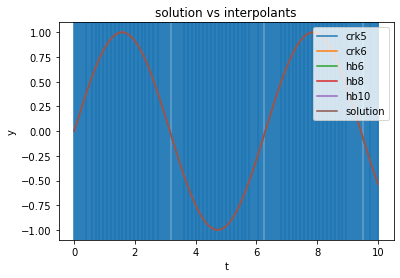

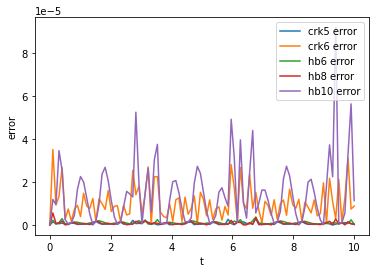

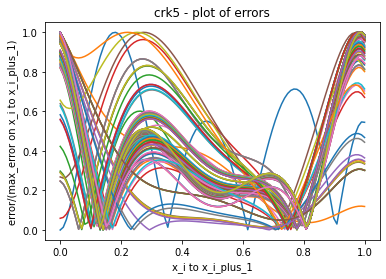

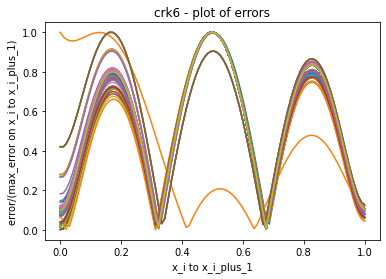

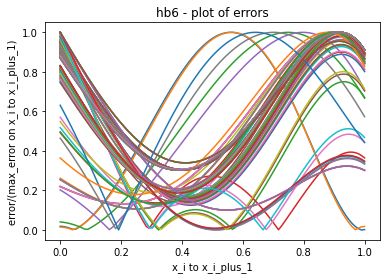

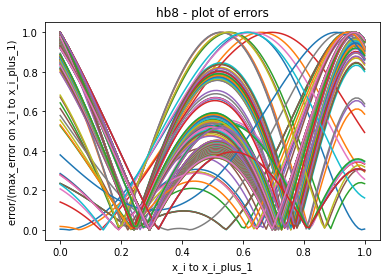

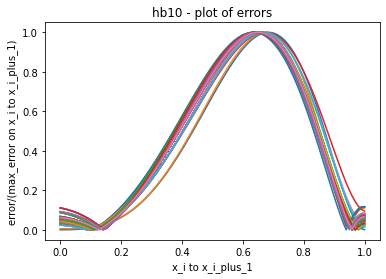

0.0
9.629260052761157e-07
1.1459673345676213e-07
1.3700664575067023e-07
2.2174392494273e-06
3.824936365526277e-06
1.2765414299786837e-06
1.3695629159926614e-06
1.5980936496073905e-06
1.8321459806514007e-06
2.0647697652198538e-06
2.2953904000866387e-06
2.523763311668148e-06
2.7496634363299854e-06
2.972870229878133e-06
3.19316465197117e-06
9.64657597635199e-07
8.383081150364902e-07
8.664644463030058e-07
9.054674687813957e-07
9.446979726268623e-07
9.833478458176614e-07
1.021332686534926e-06
1.058623376293255e-06
1.0951945627057924e-06
1.1310201707415146e-06
1.1660762792020662e-06
1.2003388555337224e-06
1.2337847580257133e-06
1.2663918824706855e-06
1.2981370837161776e-06
1.328998865623987e-06
1.3589567240401834e-06
1.387989797096978e-06
1.4160788061046148e-06
1.4432041894885117e-06
1.469347745919336e-06
1.4944919797255096e-06
1.5186190698290858e-06
1.5417131676853657e-06
1.5637582082561607e-06
1.5847393540768806e-06
1.6046426205562625e-06
1.6234542289383924e-06
1.6411609869981802e-06
1.657

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tried step 0 estimated_error= 0.24315612564018219
tried step 0 estimated_error= 1.2123898711907195
tried step 0 estimated_error= 0.6361184392678954
tried step 0 estimated_error= 0.04720014927142935
tried step 0 estimated_error= 0.022145651828980872
tried step 0 estimated_error= 0.032442273688644274
tried step 0 estimated_error= 0.014338108525235205
tried step 0 estimated_error= 0.002088941265440347
tried step 0 estimated_error= 0.001150995324629367
tried step 0 estimated_error= 0.0009935548097197433
tried step 0 estimated_error= 0.0004824921100650137
tried step 0 estimated_error= 0.00019462172694417745
tried step 0 estimated_error= 7.240688229037673e-05
tried step 0 estimated_error= 2.591248074290675e-05
tried step 0 estimated_error= 9.088299626647256e-06
step accepted 0 estimated_error= 9.088299626647256e-06
tried step 0.07788656582264941 estimated_error= 3.969354585464657e-06
step accepted 0.07788656582264941 estimated_error= 3.969354585464657e-06
tried step 0.15577313164529882 estim

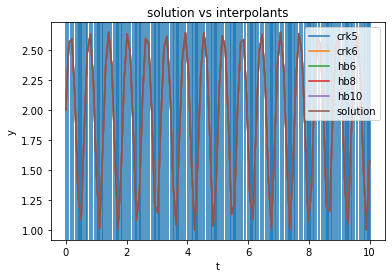

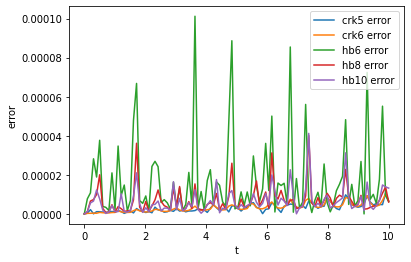

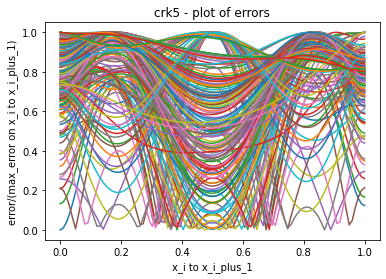

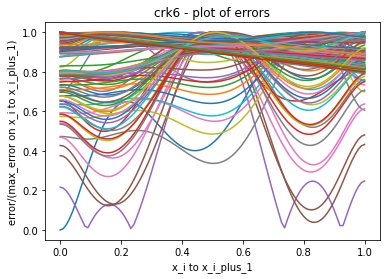

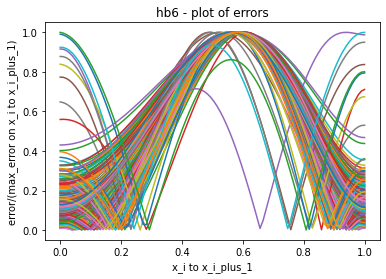

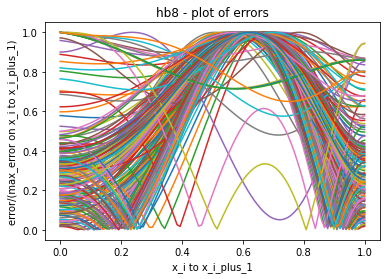

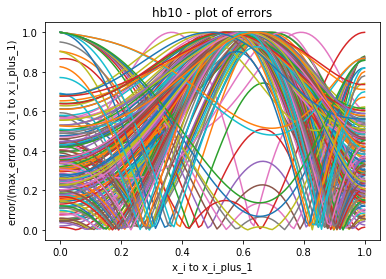

0.0
2.694987570883711e-07
2.9271966051069853e-07
3.658701279718457e-07
4.5576425233839757e-07
5.214851581669677e-07
5.277785206647678e-07
6.526661489036911e-07
7.820505503186581e-07
6.444872653332823e-07
5.884713305537304e-07
5.285402422394725e-07
4.859055642292276e-07
4.962197803770607e-07
5.490387713358302e-07
6.81098031751759e-07
8.70567736122041e-07
1.027372146467087e-06
1.317215603480193e-06
1.382721535714282e-06
1.1339146785971366e-06
9.755752843343402e-07
8.418978794111354e-07
7.547512379524335e-07
7.503788861384919e-07
8.22994201232774e-07
1.0223788511343201e-06
1.336990091305168e-06
1.6273663587806908e-06
1.9829996769082925e-06
1.9865486375891805e-06
1.6263030953034274e-06
1.3647166881014527e-06
1.1565226420984231e-06
1.0243263814935233e-06
1.004866513998337e-06
1.0969081745137998e-06
1.3630289295019082e-06
1.8018448275647359e-06
2.2256249430085973e-06
2.649830607825976e-06
2.593395983740976e-06
2.1215661387685714e-06
1.755827710336888e-06
1.4723562471452567e-06
1.294579575539

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tried step 0 estimated_error= 0.0007357118590166634
tried step 0 estimated_error= 0.000327375401022012
tried step 0 estimated_error= 0.00014104768808553825
tried step 0 estimated_error= 5.897847979929871e-05
tried step 0 estimated_error= 2.3993063930305425e-05
tried step 0 estimated_error= 9.519467573437801e-06
step accepted 0 estimated_error= 9.519467573437801e-06
tried step 0.401877572016461 estimated_error= 1.155881770187328e-06
step accepted 0.401877572016461 estimated_error= 1.155881770187328e-06
tried step 0.803755144032922 estimated_error= 6.181698793961132e-07
step accepted 0.803755144032922 estimated_error= 6.181698793961132e-07
tried step 1.2860082304526752 estimated_error= 3.633272112613106e-07
step accepted 1.2860082304526752 estimated_error= 3.633272112613106e-07
tried step 1.8647119341563791 estimated_error= 2.2926019521696261e-07
step accepted 1.8647119341563791 estimated_error= 2.2926019521696261e-07
tried step 2.559156378600824 estimated_error= 1.527755476016246e-07
st

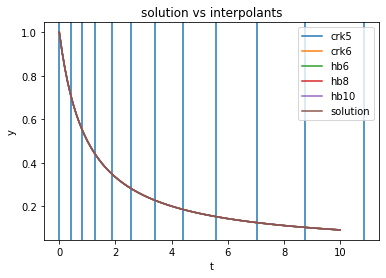

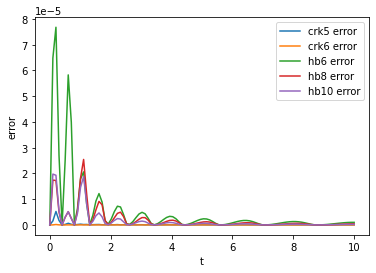

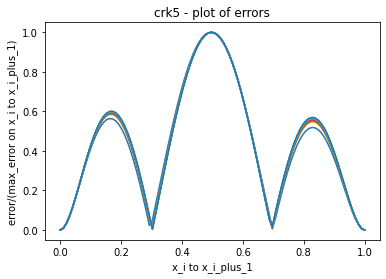

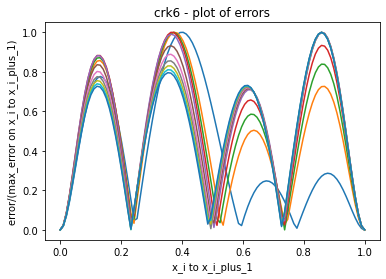

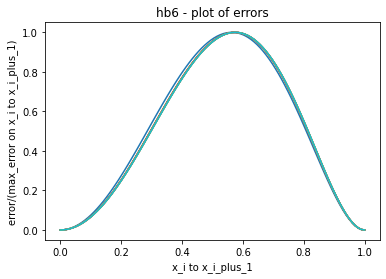

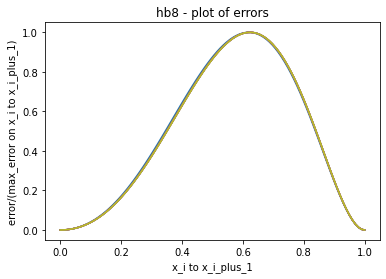

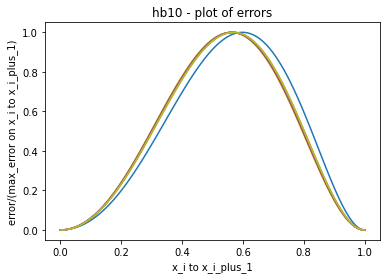

0.0
1.2736478538499796e-12
1.2171375018965591e-12
1.0916267889626852e-12
9.582334925539726e-13
8.191225475684405e-13
7.149558722829852e-13
6.343259251195832e-13
5.15643083787154e-13
4.507783035734292e-13
3.876343690478734e-13
3.374245327592007e-13


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tried step 0 estimated_error= 4.637099418447477e-06
step accepted 0 estimated_error= 4.637099418447477e-06
tried step 1 estimated_error= 4.044495645172397e-06
step accepted 1 estimated_error= 4.044495645172397e-06
tried step 2.2 estimated_error= 4.224444595790633e-05
tried step 2.2 estimated_error= 1.4422897022914327e-05
tried step 2.2 estimated_error= 4.845202484227151e-06
step accepted 2.2 estimated_error= 4.845202484227151e-06
tried step 3.2 estimated_error= 8.390151968851178e-06
step accepted 3.2 estimated_error= 8.390151968851178e-06
tried step 4.4 estimated_error= 5.670640407351435e-06
step accepted 4.4 estimated_error= 5.670640407351435e-06
tried step 5.6000000000000005 estimated_error= 1.0244816651405753e-05
tried step 5.6000000000000005 estimated_error= 3.529881461572515e-06
step accepted 5.6000000000000005 estimated_error= 3.529881461572515e-06
tried step 6.6000000000000005 estimated_error= 3.932574366483088e-06
step accepted 6.6000000000000005 estimated_error= 3.932574366483

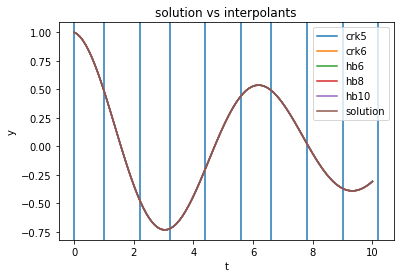

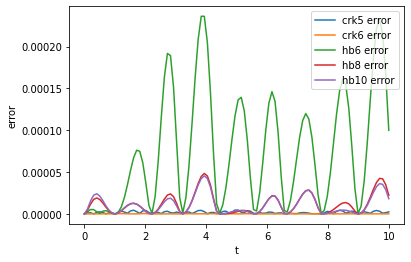

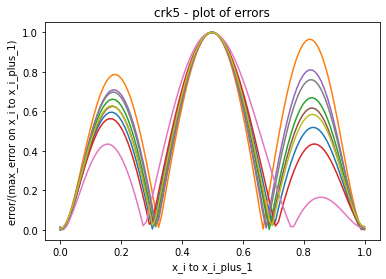

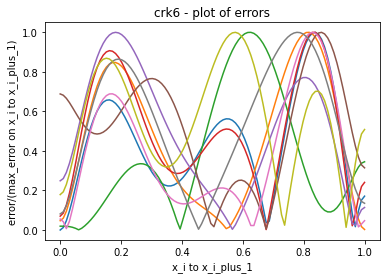

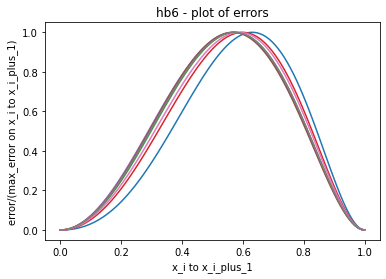

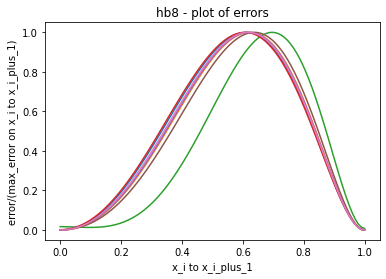

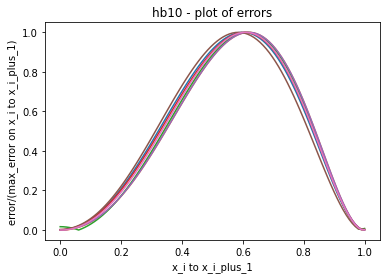

0.0
2.0138854361917424e-08
1.1496638085972677e-09
2.052527559026629e-08
7.055732190175412e-08
3.23037115390612e-08
1.4765016487228166e-08
1.2567181146422302e-08
2.0888906826499465e-08
5.930503288453792e-08


In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tried step 0 estimated_error= 0.002026315504268905
tried step 0 estimated_error= 0.0009610011805903929
tried step 0 estimated_error= 0.00038876896456263577
tried step 0 estimated_error= 0.0001463039935888366
tried step 0 estimated_error= 5.293003181661149e-05
tried step 0 estimated_error= 1.8700276785299508e-05
tried step 0 estimated_error= 6.507191584015359e-06
step accepted 0 estimated_error= 6.507191584015359e-06
tried step 0.3348979766803842 estimated_error= 3.3304637063746867e-06
step accepted 0.3348979766803842 estimated_error= 3.3304637063746867e-06
tried step 0.6697959533607684 estimated_error= 4.898582601164936e-06
step accepted 0.6697959533607684 estimated_error= 4.898582601164936e-06
tried step 1.0716735253772294 estimated_error= 6.206653290541375e-06
step accepted 1.0716735253772294 estimated_error= 6.206653290541375e-06
tried step 1.5539266117969825 estimated_error= 2.3657835930279703e-06
step accepted 1.5539266117969825 estimated_error= 2.3657835930279703e-06
tried step 2

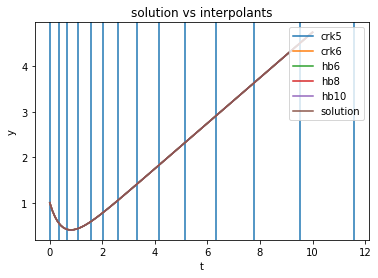

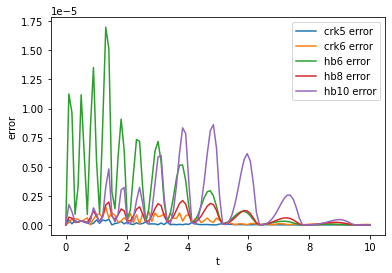

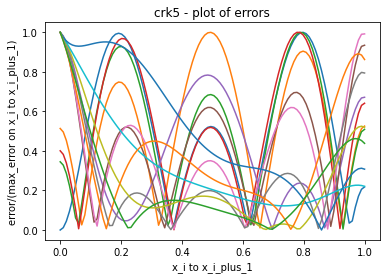

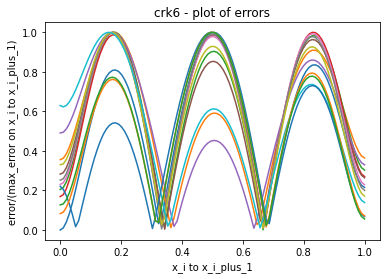

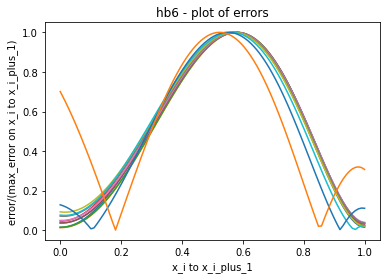

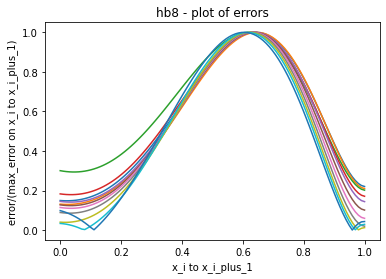

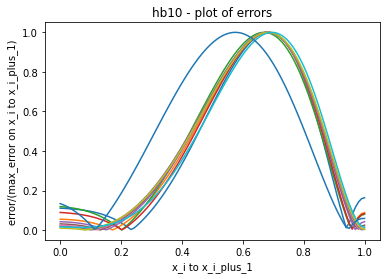

0.0
1.7713294242494015e-07
1.8131683166000556e-07
2.676248299082751e-07
4.28253696171943e-07
2.875897499032831e-07
2.6881063219796886e-07
2.666724592259584e-07
2.1180237430584725e-07
1.1010133560418467e-07
2.434515966598383e-08
7.497263698752477e-09
6.471881697223125e-09
2.8381847982927866e-09


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)